<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/Basic%20code/%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%8F_pandas_default_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로그데이터 처리 및 시각화 Basic Code

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
a = (1051,1051,1051,1051,1051,2073,2073,2073,2073,3063,3063,3063,3053,3024,3024)
b = ('aBxD','aBxD','aBxD','aBxD','aBxD','bDbD','bDbD','bDbC','bDbC','aaaa','aaab','aaac', '5DaD','aDDD','aDDE')
c = ('2021-10-31','2021-10-31','2021-10-31','2021-11-01','2021-11-01','2021-10-31','2021-10-31','2021-10-30', '2021-10-29','2021-11-07','2021-11-08','2021-11-09','2021-11-09','2021-11-09','2021-11-10')
df = pd.DataFrame({"user_id":a, "session_id":b, "date": c})

In [ ]:
df_vis = (
    df.groupby('session_id')['date'].count() # 'session_id'를 기준으로 groupby하고, 'date' column을 count한다
    .reset_index() # Series를 DataFrame으로 바꾸는 테크닉
    .rename(columns = {'date':'date_count'})) # column명을 date에서 date_count로 변경
df_vis

,session_id,date_count
0,5DaD,1
1,aBxD,5
2,aDDD,1
3,aDDE,1
4,aaaa,1
5,aaab,1
6,aaac,1
7,bDbC,2
8,bDbD,2


Text(0, 0.5, 'y_label')

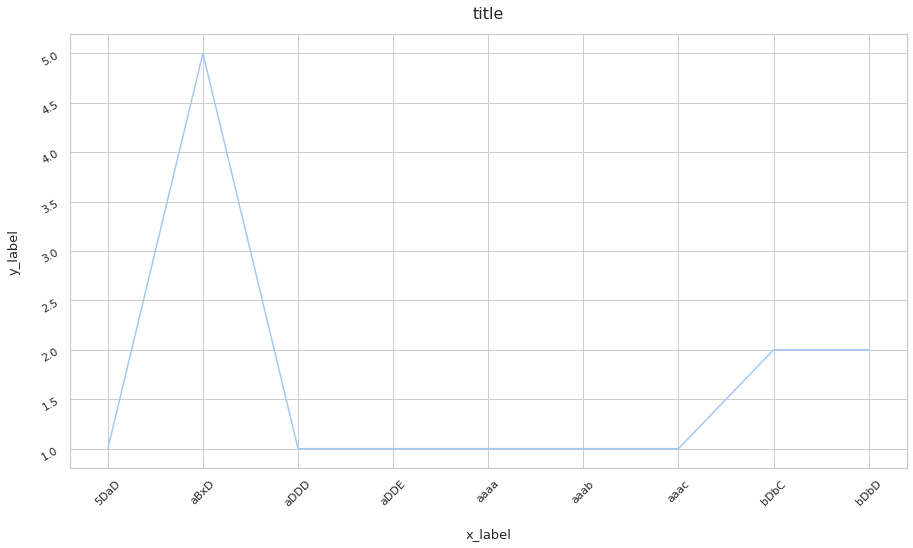

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
# plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45) # X 라벨 회전각
plt.yticks(rotation=30) # X 라벨 회전각

g = sns.lineplot(x='session_id', y='date_count', data=df_vis) # line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(1)) # x축간격을 얼마나 벌릴것인지

g.set_title("title", pad = 15, size = 16)
g.set_xlabel("x_label",labelpad = 20, size = 13)
g.set_ylabel("y_label",labelpad = 20, size = 13) 

In [ ]:
df_vis2 = df_vis.copy()
df_vis2['new_col'] = [3,2,1,4,5,23,34,1,2]
df_vis2['type'] = 1
df_temp = df_vis2.copy()
df_temp['type'] = 2
df_temp['date_count'] = df_vis2['date_count']*3

df_new = df_vis2.append(df_temp, ignore_index = True)
df_new.iloc[6:12,:]

,session_id,date_count,new_col,type
6,aaac,1,34,1
7,bDbC,2,1,1
8,bDbD,2,2,1
9,5DaD,3,3,2
10,aBxD,15,2,2
11,aDDD,3,1,2


Text(0, 0.5, 'y_label')

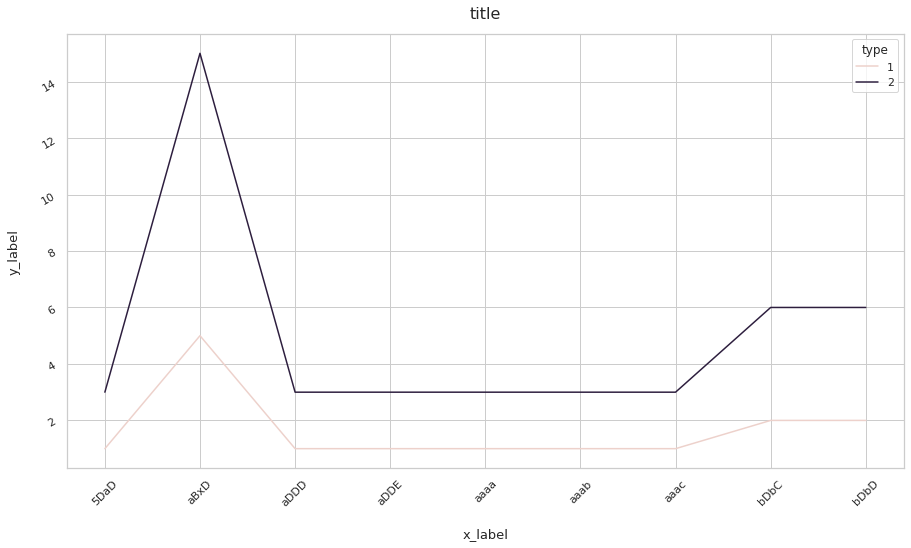

In [ ]:
sns.set_theme(style="whitegrid", palette="Greys")
plt.xticks(rotation=45)
plt.yticks(rotation=30) 

g = sns.lineplot(x='session_id', y='date_count', hue='type', data=df_new)
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(1))

g.set_title("title", pad = 15, size = 16)
g.set_xlabel("x_label",labelpad = 20, size = 13)
g.set_ylabel("y_label",labelpad = 20, size = 13) 

In [ ]:
df_cohort = df.copy()
df_cohort['date'] = pd.to_datetime(df_cohort['date'])
df_cohort.head()

,user_id,session_id,date
0,1051,aBxD,2021-10-31
1,1051,aBxD,2021-10-31
2,1051,aBxD,2021-10-31
3,1051,aBxD,2021-11-01
4,1051,aBxD,2021-11-01


In [ ]:
df_first_visit = df_cohort.groupby('user_id').min().reset_index().rename(columns={'date':'first_day'})
df_first_visit


,user_id,session_id,first_day
0,1051,aBxD,2021-10-31
1,2073,bDbC,2021-10-29
2,3024,aDDD,2021-11-09
3,3053,5DaD,2021-11-09
4,3063,aaaa,2021-11-07


In [ ]:
df_cohort2 = df_cohort.merge(df_first_visit[['user_id','first_day']], on = 'user_id')
df_cohort2.info()
df_cohort2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     15 non-null     int64         
 1   session_id  15 non-null     object        
 2   date        15 non-null     datetime64[ns]
 3   first_day   15 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 600.0+ bytes


,user_id,session_id,date,first_day
0,1051,aBxD,2021-10-31,2021-10-31
1,1051,aBxD,2021-10-31,2021-10-31
2,1051,aBxD,2021-10-31,2021-10-31
3,1051,aBxD,2021-11-01,2021-10-31
4,1051,aBxD,2021-11-01,2021-10-31


In [ ]:
# datetime formatting
df_cohort2['first_month'] = df_cohort2['first_day'].dt.strftime('%y-%m')
df_cohort2.head()

,user_id,session_id,date,first_day,first_month
0,1051,aBxD,2021-10-31,2021-10-31,21-10
1,1051,aBxD,2021-10-31,2021-10-31,21-10
2,1051,aBxD,2021-10-31,2021-10-31,21-10
3,1051,aBxD,2021-11-01,2021-10-31,21-10
4,1051,aBxD,2021-11-01,2021-10-31,21-10


In [ ]:
df_dau = df_cohort2.groupby('date')['user_id'].count().reset_index().rename(columns = {'user_id' : 'user_cnt'})
df_dau

,date,user_cnt
0,2021-10-29,1
1,2021-10-30,1
2,2021-10-31,5
3,2021-11-01,2
4,2021-11-07,1
5,2021-11-08,1
6,2021-11-09,3
7,2021-11-10,1


In [ ]:
df_cohort3 = df_cohort2.merge(df_dau, on = 'date')
df_cohort3.drop_duplicates(inplace=True)
df_cohort3.sort_values(by = 'date',inplace = True)
df_cohort3.reset_index(drop = True,inplace = True)
# df_cohort3['date'] = df_cohort3['date'].dt.strftime('%y-%m-%d')
df_cohort3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      11 non-null     int64         
 1   session_id   11 non-null     object        
 2   date         11 non-null     datetime64[ns]
 3   first_day    11 non-null     datetime64[ns]
 4   first_month  11 non-null     object        
 5   user_cnt     11 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 656.0+ bytes


In [ ]:

cohort = df_cohort3.copy()


# datetime type 숫자 연산 방법
cohort['diff_day']= \
    cohort['date'].dt.to_period('D').astype(int) \
    - cohort['first_day'].dt.to_period('D').astype(int)

# datetime 형식은 그래프에서 초까지 나오기 때문에 object(str) type으로 변경
cohort['date'] = cohort['date'].dt.strftime('%y-%m-%d')


cohort = cohort[['date','diff_day','user_cnt']]
cohort.drop_duplicates(inplace = True)
cohort.set_index(['date','diff_day'],inplace = True
                 , append = False) # 기존 index를 남길것인지 여부 결정
                 # 여기서는 0~10까지의 index를 없애는것으로 설정
cohort

user_cnt
date     diff_day          
21-10-29 0                1
21-10-30 1                1
21-10-31 0                5
         2                5
21-11-01 1                2
21-11-07 0                1
21-11-08 1                1
21-11-09 2                3
         0                3
21-11-10 1                1

In [ ]:
vis_cohort=cohort['user_cnt'].unstack()
vis_cohort

diff_day,0,1,2
date,,,
21-10-29,1.0,NaN,NaN
21-10-30,NaN,1.0,NaN
21-10-31,5.0,NaN,5.0
21-11-01,NaN,2.0,NaN
21-11-07,1.0,NaN,NaN
21-11-08,NaN,1.0,NaN
21-11-09,3.0,NaN,3.0
21-11-10,NaN,1.0,NaN


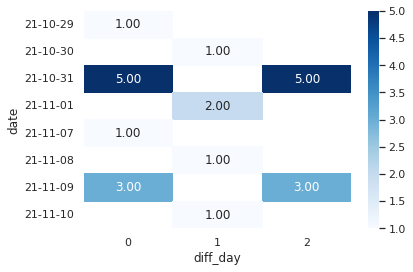

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.heatmap(vis_cohort, annot=True
                , fmt='.2f' # '.2%' -> 소수점 2자리 *100 + % 꼴
                , cmap="Blues"
                )

# 유용한 Skills

### One Column으로 One hot encoding 하기 (손코딩 활용)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a = (1051,1051,1051,1051,1051,2073,2073,2073,2073,3063,3063,3063,3053,3024,3024)
a = [str(x) for x in a]
b = ('aBxD','aBxD','aBxD','aBxD','aBxD','bDbD','bDbD','bDbC','bDbC','aaaa','aaab','aaac', '5DaD','aDDD','aDDE')
c = ('2021-10-31','2021-10-31','2021-10-31','2021-11-01','2021-11-01','2021-10-31','2021-10-31','2021-10-30', '2021-10-29','2021-11-07','2021-11-08','2021-11-09','2021-11-09','2021-11-09','2021-11-10')
df = pd.DataFrame({"user_id":a, "session_id":b, "date": c})

In [ ]:
print(len(df['date']))
print(df['user_id'].nunique())
print(df['session_id'].nunique())
print(df['date'].nunique())

15
5
9
8


In [ ]:
df.head()

,user_id,session_id,date
0,1051,aBxD,2021-10-31
1,1051,aBxD,2021-10-31
2,1051,aBxD,2021-10-31
3,1051,aBxD,2021-11-01
4,1051,aBxD,2021-11-01


In [ ]:
mapper = {}
for i, col_name in enumerate(df.columns):
  print(i,col_name)
  for j in df[col_name].unique():
    mapper['col_'+ str(i) +'_value_' + j ] = len(mapper) # category별 index 설정
    print(mapper)
  print("="*10)
print("최종 mapper : ", mapper)

0 user_id
{'col_0_value_1051': 0}
{'col_0_value_1051': 0, 'col_0_value_2073': 1}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3, 'col_0_value_3024': 4}
1 session_id
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3, 'col_0_value_3024': 4, 'col_1_value_aBxD': 5}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3, 'col_0_value_3024': 4, 'col_1_value_aBxD': 5, 'col_1_value_bDbD': 6}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3, 'col_0_value_3024': 4, 'col_1_value_aBxD': 5, 'col_1_value_bDbD': 6, 'col_1_value_bDbC': 7}
{'col_0_value_1051': 0, 'col_0_value_2073': 1, 'col_0_value_3063': 2, 'col_0_value_3053': 3, 'col_0_value_3024': 4, 'col_1_value_aBxD': 5, 'c

In [ ]:
df_temp = df.copy()
df_temp['one_hot']= df_temp[df.columns].values.tolist()
df_temp.head()

,user_id,session_id,date,one_hot
0,1051,aBxD,2021-10-31,"[1051, aBxD, 2021-10-31]"
1,1051,aBxD,2021-10-31,"[1051, aBxD, 2021-10-31]"
2,1051,aBxD,2021-10-31,"[1051, aBxD, 2021-10-31]"
3,1051,aBxD,2021-11-01,"[1051, aBxD, 2021-11-01]"
4,1051,aBxD,2021-11-01,"[1051, aBxD, 2021-11-01]"


In [ ]:
np.zeros(len(mapper))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
row = 0
lst = []
for i in df_temp['one_hot']:
  temp_array = np.zeros(len(mapper))
  num = 0
  for j in i:
    idx = mapper['col_'+ str(num) +'_value_' + j ] # value값에 맞는 index를 찾아보자
    temp_array[idx] = 1 # 해당 index를 포함하므로 array에 0대신 1값을 넣어주자
    num+=1
  lst.append(temp_array)
df_temp['one_hot_encoding'] = lst

In [ ]:
df_temp['one_hot_encoding'][0]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
df_temp['one_hot_encoding'][3]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.])

### One Column으로 One hot encoding 하기(함수로 만들어서 활용)

In [ ]:

def map_one_hot(df, column_names, result_column_name):      
    mapper = {}                                             
    for i, col_name in enumerate(column_names):             
        for val in df[col_name].unique():                   
            mapper['col_'+ str(i) + '_val_' + val] = len(mapper) # column, value에 따라서 각각 하나의 값으로 매칭
    
    def one_hot(values):
        v = np.zeros( len(mapper) )
        for i, val in enumerate(values):
            mapped_val_index = mapper['col_' + str(i) + '_val_' + val]
            v[mapped_val_index] = 1
        return v    
    
    df_ext = df.copy()
    df_ext[result_column_name] = df_ext[column_names].values.tolist() # --------★ column value값을 묶어 array형태가 되면, column값으로 넣어줄 수 없으므로 list화 시켜서 value값을 넣어주는 스킬
    df_ext[result_column_name] = df_ext[result_column_name].map(one_hot) # --------★ map 함수로 넣어주는게 포인트
    
    return df_ext, mapper

In [ ]:
df_oh, df_oh_mapper= map_one_hot(df,['user_id','session_id','date'],'total_one_hot')

In [ ]:
df_oh

,user_id,session_id,date,total_one_hot
0,1051,aBxD,2021-10-31,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,1051,aBxD,2021-10-31,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,1051,aBxD,2021-10-31,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,1051,aBxD,2021-11-01,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,1051,aBxD,2021-11-01,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
5,2073,bDbD,2021-10-31,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
6,2073,bDbD,2021-10-31,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
7,2073,bDbC,2021-10-30,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
8,2073,bDbC,2021-10-29,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
9,3063,aaaa,2021-11-07,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
